### Importing the necessary libraries

In [13]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Gathering the dataset

In [14]:
ssa= pd.read_csv("SampleSuperstore.csv")

### Understand the dataset

In [15]:
ssa.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Dropping unnecessary columns

In [16]:
#Droping unnecessary columns
ssa.drop(columns="Postal Code" ,inplace=True)

In [17]:
ssa.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [18]:
ssa.tail()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [19]:
#Shipping mode used the most
ssa["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64


### Unique number of columns

In [20]:
# seeing the value counts
print(ssa[['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']].nunique())

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64


In [21]:
# seeing the unique values
print(ssa['Ship Mode'].unique())
print(ssa['Segment'].unique())
print(ssa['Country'].unique())
print(ssa['Category'].unique())
print(ssa['Sub-Category'].unique())
print(ssa['Region'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['South' 'West' 'Central' 'East']


In [22]:
#Statistical description of data
ssa.describe(include= "all")

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [23]:
ssa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


# Checking the NULL values

In [24]:
#Checking the NULL values
ssa.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Statistical Analysis

In [25]:
ssa.groupby("Region")["Sales"].mean()


Region
Central    215.772661
East       238.336110
South      241.803645
West       226.493233
Name: Sales, dtype: float64

In [26]:
ssa.groupby("Category")["Sales"].mean()

Category
Furniture          349.834887
Office Supplies    119.324101
Technology         452.709276
Name: Sales, dtype: float64

In [27]:
ssa.groupby("Segment")["Sales"].mean()

Segment
Consumer       223.733644
Corporate      233.823300
Home Office    240.972041
Name: Sales, dtype: float64

# Visualisations

### Region categorised on basis of sum of Sales

<Axes: xlabel='Region'>

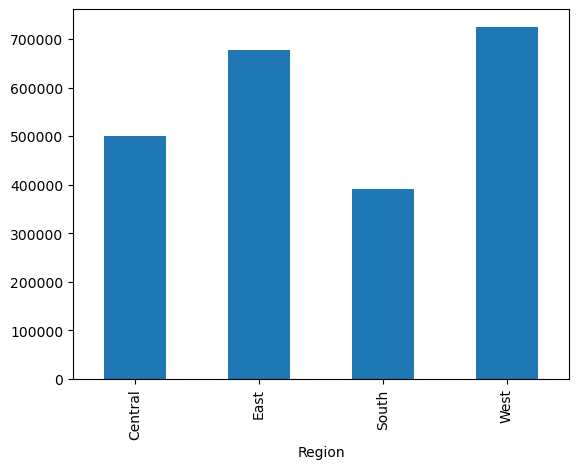

In [28]:
ssa.groupby("Region")["Sales"].sum().plot.bar()

<Axes: ylabel='Sales'>

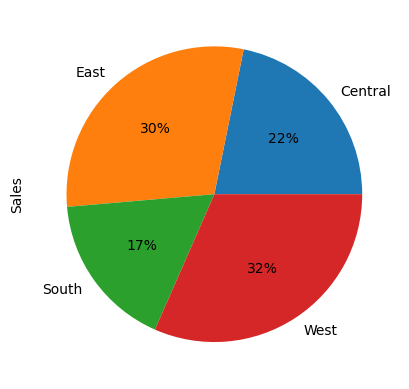

In [29]:
ssa.groupby("Region")["Sales"].sum().plot.pie(autopct ="%1.0f%%")


### Region categorised on basis of sum of Profit

<Axes: xlabel='Region'>

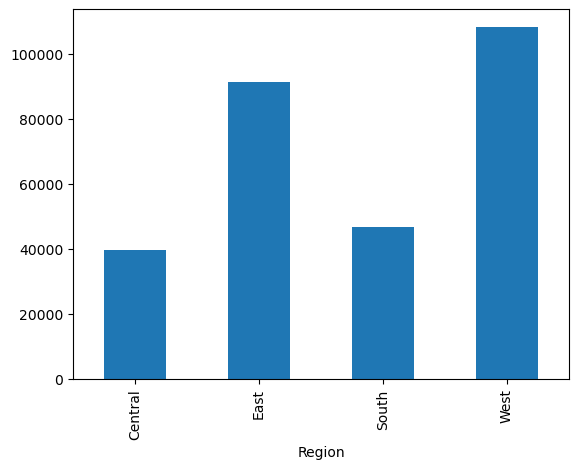

In [30]:
ssa.groupby("Region")["Profit"].sum().plot.bar()

<Axes: ylabel='Profit'>

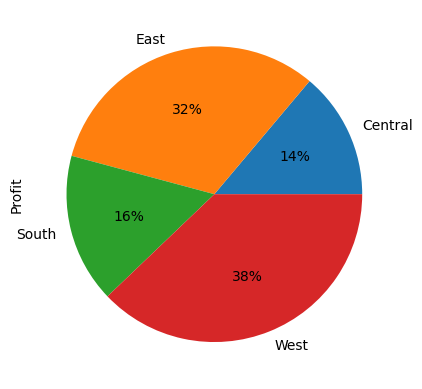

In [31]:
ssa.groupby("Region")["Profit"].sum().plot.pie(autopct = "%1.0f%%")


### Segment categorised on basis of Sales & profit



<Axes: xlabel='Segment'>

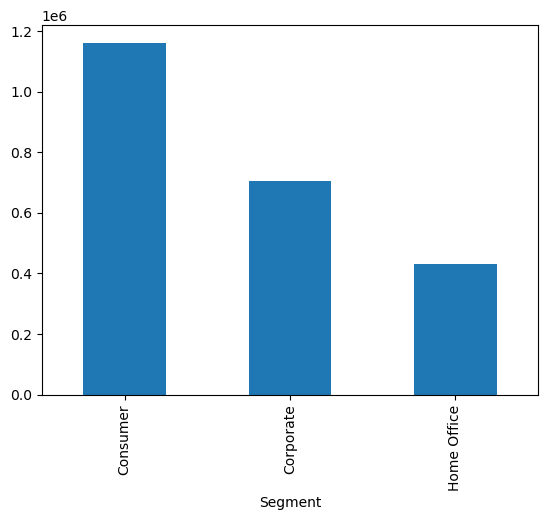

In [32]:
ssa.groupby("Segment")["Sales"].sum().plot.bar()

<Axes: ylabel='Sales'>

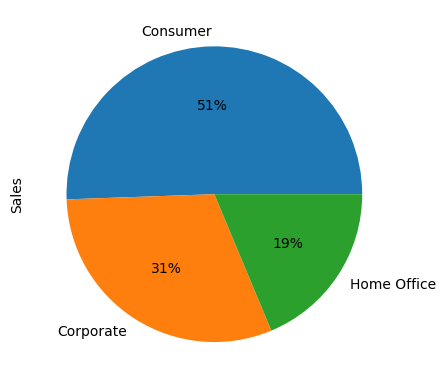

In [63]:
#Segment on basis of sales
ssa.groupby("Segment")["Sales"].sum().plot.pie(autopct = "%1.0f%%")

<Axes: xlabel='Segment'>

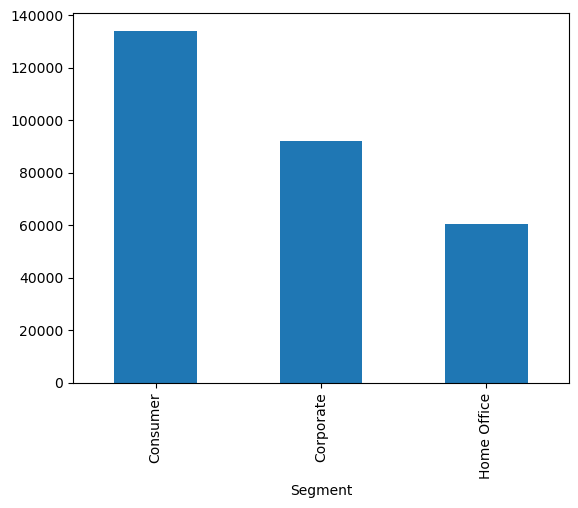

In [33]:
#Segment on basis of Profit

ssa.groupby("Segment")["Profit"].sum().plot.bar()

### Categorywise sale 


<Axes: xlabel='Category'>

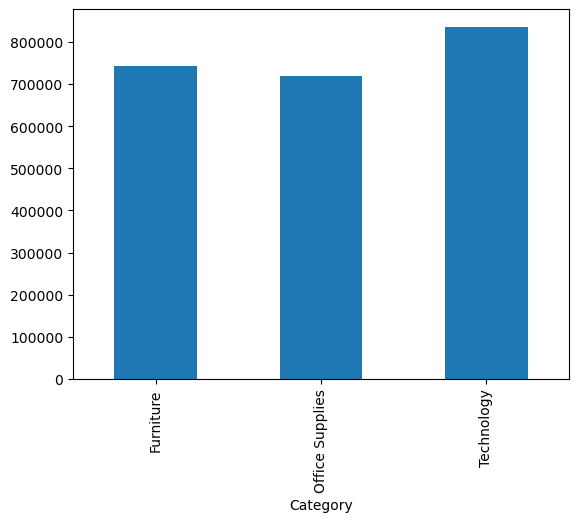

In [34]:
#Category on basis of sales
ssa.groupby("Category")["Sales"].sum().plot.bar()

<Axes: xlabel='Category'>

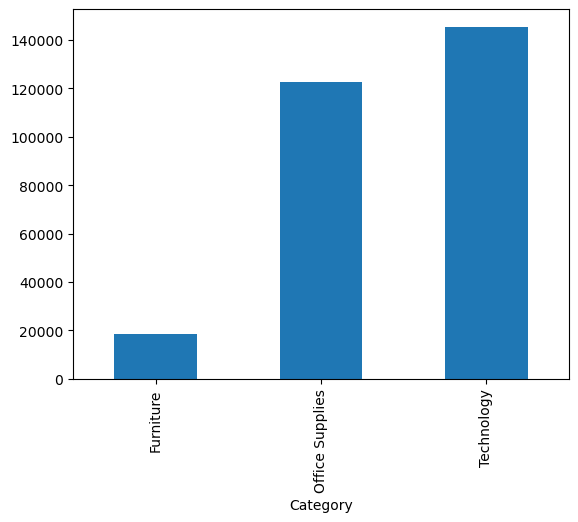

In [35]:
#Category on basis of Profit
ssa.groupby("Category")["Profit"].sum().plot.bar()

<Axes: ylabel='Sales'>

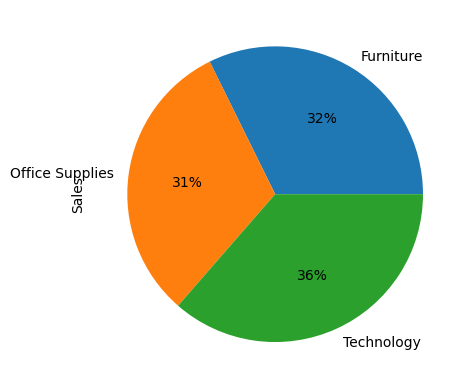

In [36]:
ssa.groupby("Category")["Sales"].sum().plot.pie(autopct = "%1.0f%%")

<Axes: ylabel='Profit'>

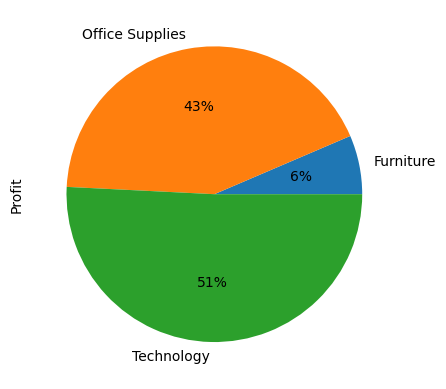

In [37]:
ssa.groupby("Category")["Profit"].sum().plot.pie(autopct = "%1.0f%%")

### 1.1 Which shipping mode does customer choose based on the products category and sum of the quantity?

In [40]:
# lets start with ship mode
ssa_ship =  ssa[["Ship Mode","Category","Quantity"]].groupby(["Ship Mode","Category"]).sum('Quantity')
ssa_ship

Quantity
Ship Mode      Category                 
First Class    Furniture            1238
               Office Supplies      3372
               Technology           1083
Same Day       Furniture             453
               Office Supplies      1147
               Technology            360
Second Class   Furniture            1569
               Office Supplies      4480
               Technology           1374
Standard Class Furniture            4768
               Office Supplies     13907
               Technology           4122

<Axes: title={'center': 'Ship mode vs Sum of Quantity'}, xlabel='Ship mode with category', ylabel='Sum of Quantity'>

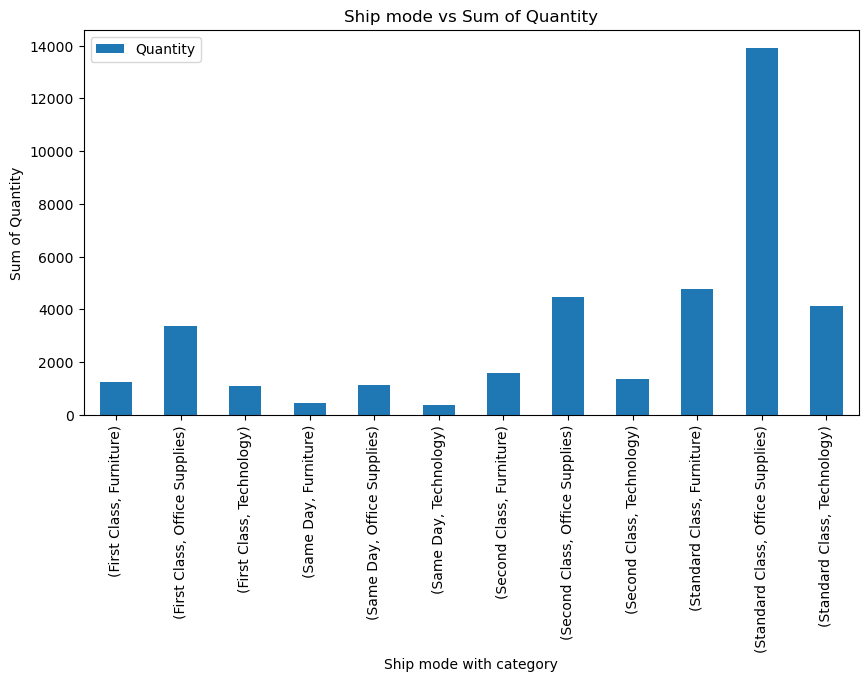

In [41]:
ssa_ship.plot(kind='bar', title='Ship mode vs Sum of Quantity',ylabel='Sum of Quantity',xlabel='Ship mode with category', figsize=(10,5))


### Conclusion: Most of the customers prefer to choose Standard mode for shipping while compared to other modes.

## 2. Maximum number of Sales from which State?


In [42]:
#Lets see State vs Maximum Sales

state_sales = pd.pivot_table(data=ssa[['State','Sales']],index=['State'], values='Sales',aggfunc='max')

state_sales.sort_values(by='Sales', ascending=False).head(10)


,Sales
State,
Florida,22638.480
Indiana,17499.950
Washington,13999.960
New York,11199.968
Delaware,10499.970
Michigan,9892.740
Minnesota,9449.950
New Jersey,9099.930
Virginia,8749.950


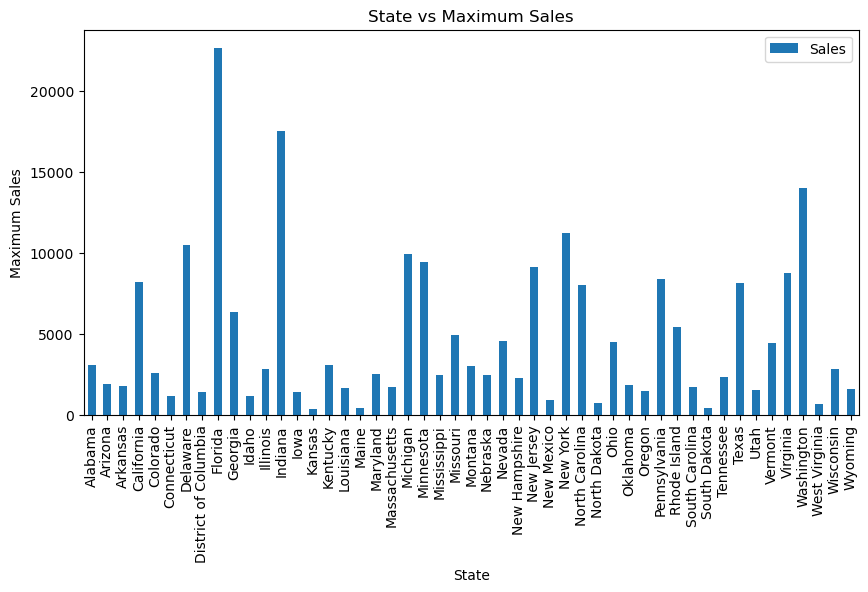

In [43]:
state_sales.plot(kind='bar', title='State vs Maximum Sales', ylabel='Maximum Sales',
         xlabel='State', figsize=(10, 5));

## Conclusion: From Florida we got maximum sales.

## 3. From which State we got maximum profit?

In [44]:
#Lets see State vs Maximum Profit
state_profit = pd.pivot_table(data=ssa[['State','Profit']],index=['State'],values='Profit',aggfunc='max')

state_profit.sort_values(by='Profit', ascending=False).head(10)

,Profit
State,
Indiana,8399.9760
Washington,6719.9808
Delaware,5039.9856
Michigan,4946.3700
Minnesota,4630.4755
New York,3919.9888
Georgia,3177.4750
Virginia,2799.9840
Rhode Island,2591.9568


<Axes: title={'center': 'State vs Maximum Profit'}, xlabel='State', ylabel='Maximum Profit'>

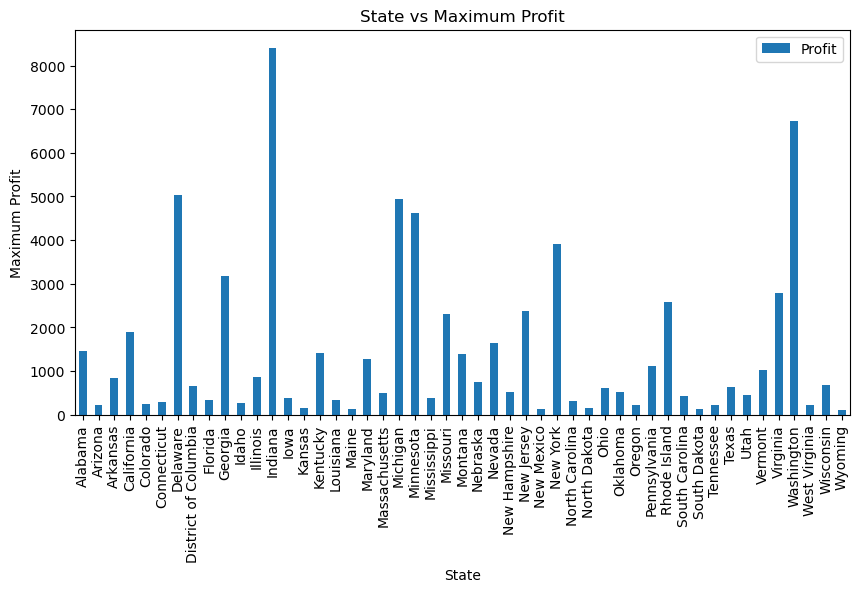

In [45]:
state_profit.plot(kind='bar', title='State vs Maximum Profit', ylabel='Maximum Profit',
         xlabel='State', figsize=(10, 5))

## Conclusion: From Indiana we got maximum profit.

## 4. Which Products are selling the most?

In [46]:
Category_sales = pd.pivot_table(data= ssa[['Category','Sub-Category','Sales']], index=['Category','Sub-Category'], values='Sales',aggfunc='max')

Category_sales

Sales
Category        Sub-Category           
Furniture       Bookcases      4404.900
                Chairs         4416.174
                Furnishings    1336.440
                Tables         4297.644
Office Supplies Appliances     2625.120
                Art            1113.024
                Binders        9892.740
                Envelopes       604.656
                Fasteners        93.360
                Labels          786.480
                Paper           733.950
                Storage        2934.330
                Supplies       8187.650
Technology      Accessories    3347.370
                Copiers       17499.950
                Machines      22638.480
                Phones         4548.810

<Axes: title={'center': 'Category vs Maximum Sales'}, xlabel='Category', ylabel='Maximum Sales'>

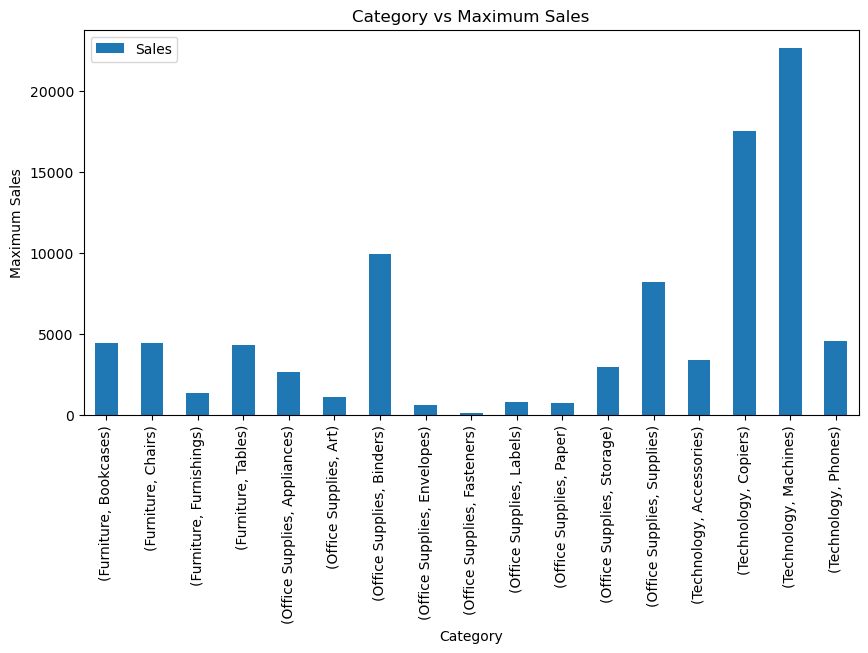

In [47]:
Category_sales.plot(kind='bar', title='Category vs Maximum Sales', ylabel='Maximum Sales',xlabel='Category', figsize=(10, 5))

## Conclusion: Machines from Technology category are selling the most.

## 5. Which Products are purchased in more quantity?

<Axes: title={'center': 'Category vs Sum of Quantity'}, xlabel='Category', ylabel='Sum of Quantity'>

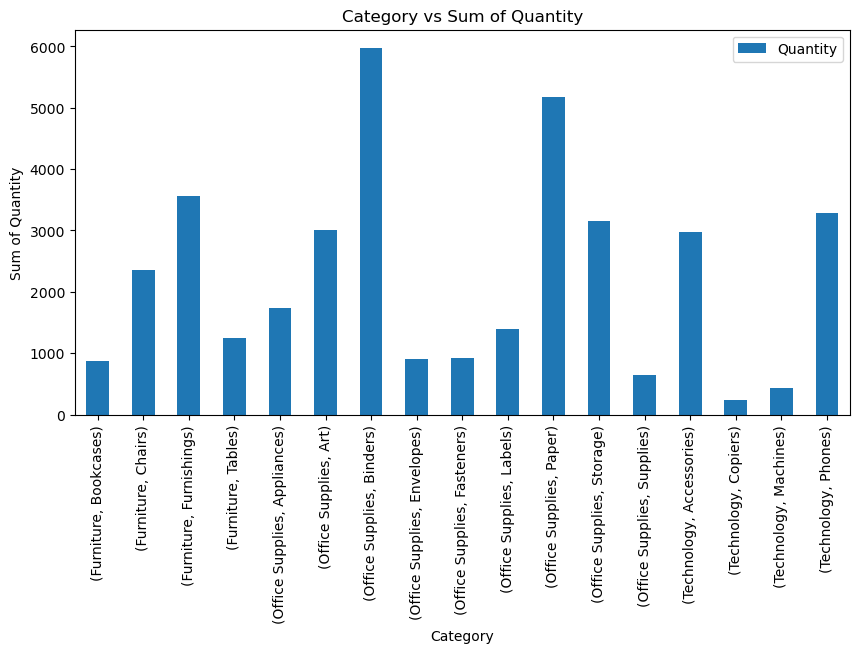

In [48]:
Category_quantity = pd.pivot_table(data=ssa[['Category','Sub-Category','Quantity']], index=['Category','Sub-Category'], values='Quantity',aggfunc='sum')
Category_quantity.plot(kind='bar', title='Category vs Sum of Quantity', ylabel='Sum of Quantity', xlabel='Category', figsize=(10, 5))

## Conclusion: Binders from Office Suppliers category are purchased in more quantity.

## 6. By selling which products we got the maximum profit?

<Axes: title={'center': 'Category vs Maximum Profit'}, xlabel='Category', ylabel='Maximum Profit'>

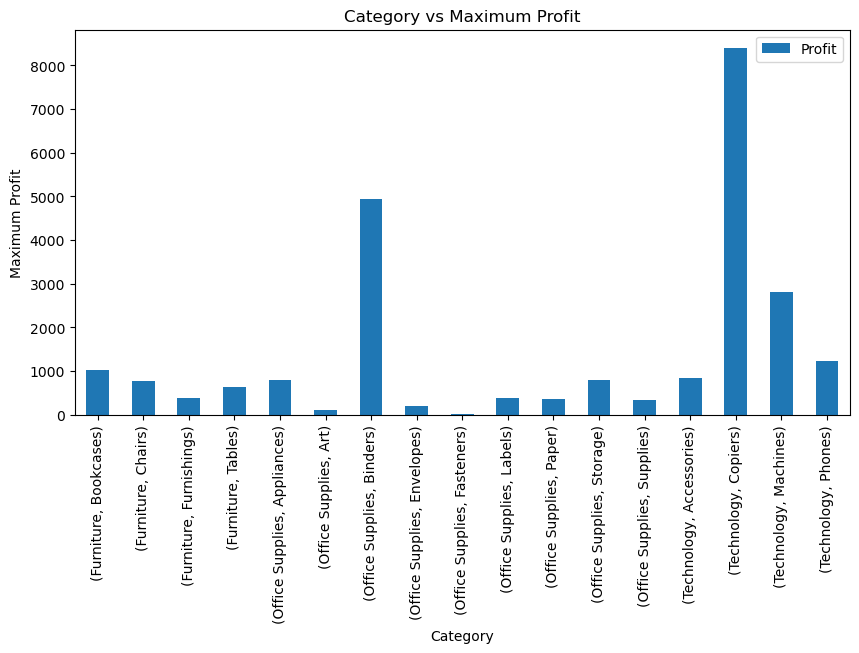

In [49]:
Category_profit = pd.pivot_table(data= ssa[['Category','Sub-Category','Profit']], index=['Category','Sub-Category'], values='Profit',aggfunc='max')


Category_profit.plot(kind='bar', title='Category vs Maximum Profit', ylabel='Maximum Profit',xlabel='Category', figsize=(10, 5))

## Conclusion: By selling Copiers from Technology category we got the maximum profit.

# Final Conclusion: 

## 1. Most of the customers prefer to choose Standard mode for shipping while compared to other modes.

## 2. From Florida we got maximum sales.

## 3. From Indiana we got maximum profit.

## 4. Machines from Technology category are selling the most.

## 5. Binders from Office Suppliers category are purchased in more quantity.

# Building a Machine Learning Model to Predict the profit

In [50]:
ssa.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [51]:

dataset1=  ssa.drop(columns=["Country","City","State","Sub-Category"])
dataset1.head()

,Ship Mode,Segment,Region,Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,South,Furniture,261.9600,2,0.00,41.9136
1,Second Class,Consumer,South,Furniture,731.9400,3,0.00,219.5820
2,Second Class,Corporate,West,Office Supplies,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,South,Furniture,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,South,Office Supplies,22.3680,2,0.20,2.5164


In [52]:
dataset1.shape

(9994, 8)

## Converting categorical variable into numerical value



In [53]:
dataset1.replace({"Ship Mode":{"Standard Class":0,"Second Class":1,"First Class":2,"Same Day":3},"Segment":{"Consumer":0,"Corporate":1,"Home Office":2},"Category":{"Office Supplies":0,"Furniture":1,"Technology":2},"Region":{"West":0,"East":1,"Central":2,"South":3}},inplace=True)
     


In [54]:
dataset1.head()

,Ship Mode,Segment,Region,Category,Sales,Quantity,Discount,Profit
0,1,0,3,1,261.9600,2,0.00,41.9136
1,1,0,3,1,731.9400,3,0.00,219.5820
2,1,1,0,0,14.6200,2,0.00,6.8714
3,0,0,3,1,957.5775,5,0.45,-383.0310
4,0,0,3,0,22.3680,2,0.20,2.5164


In [55]:
dataset1.columns


Index(['Ship Mode', 'Segment', 'Region', 'Category', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [56]:
x= dataset1[['Ship Mode', 'Segment', 'Region', 'Category', 'Sales', 'Quantity','Discount']]

x

,Ship Mode,Segment,Region,Category,Sales,Quantity,Discount
0,1,0,3,1,261.9600,2,0.00
1,1,0,3,1,731.9400,3,0.00
2,1,1,0,0,14.6200,2,0.00
3,0,0,3,1,957.5775,5,0.45
4,0,0,3,0,22.3680,2,0.20
...,...,...,...,...,...,...,...
9989,1,0,3,1,25.2480,3,0.20
9990,0,0,0,1,91.9600,2,0.00
9991,0,0,0,2,258.5760,2,0.20
9992,0,0,0,0,29.6000,4,0.00


In [57]:
y= dataset1['Profit']
y

0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9994, dtype: float64

### Rescaling the Features

In [58]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=["Sales"]
x[num_vars]=scaler.fit_transform(x[num_vars])
print(x)
     

      Ship Mode  Segment  Region  Category     Sales  Quantity  Discount
0             1        0       3         1  0.011552         2      0.00
1             1        0       3         1  0.032313         3      0.00
2             1        1       0         0  0.000626         2      0.00
3             0        0       3         1  0.042280         5      0.45
4             0        0       3         0  0.000968         2      0.20
...         ...      ...     ...       ...       ...       ...       ...
9989          1        0       3         1  0.001096         3      0.20
9990          0        0       0         1  0.004043         2      0.00
9991          0        0       0         2  0.011403         2      0.20
9992          0        0       0         0  0.001288         4      0.00
9993          1        0       0         0  0.010722         2      0.00

[9994 rows x 7 columns]


C:\Users\aasth\AppData\Local\Temp\ipykernel_27560\1239545098.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[num_vars]=scaler.fit_transform(x[num_vars])


### Spliting the dataset into training and testing data



In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
     

(7495, 7) (2499, 7) (7495,) (2499,)


## Creating Machine Learning Model



In [60]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=0,n_estimators=117)
model.fit(x_train,y_train)
     

RandomForestRegressor(n_estimators=117, random_state=0)

## Predicting the test data

In [61]:
y_pred= model.predict(x_test)


from sklearn.metrics import r2_score
print("R2 Score=",r2_score(y_pred,y_test)*100)
     

R2 Score= 74.08726753438233


In [62]:
y_pred

array([16.1209641 ,  3.00661026,  5.68275726, ..., 14.77857778,
        2.83964444, 18.5089812 ])